In [1]:
!pip install torch==1.12.1
!pip install torchmetrics
import torch
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.12.1 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.12.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.12.1 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.12.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━

'1.12.1+cu102'

In [2]:
#Import torch dependencies
import torchvision
import torchvision.transforms as transforms
from torchmetrics.classification import MulticlassAccuracy
from torchmetrics import Accuracy
# file unpickle 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104impl8GPUTrace13gpuTraceStateE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
#Data loader: 
transform = transforms.Compose([transforms.ToTensor(),transforms.RandomHorizontalFlip(p=1)])
batch_size = 10000

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
#dropout
#batch norm
#group norm
#resnet
#dla
#vgg

In [5]:
dict1 = unpickle(file='./data/cifar-10-batches-py/data_batch_1')
dict2 = unpickle(file='./data/cifar-10-batches-py/data_batch_2')
dict3 = unpickle(file='./data/cifar-10-batches-py/data_batch_3')
dict4 = unpickle(file='./data/cifar-10-batches-py/data_batch_4')
dict5 = unpickle(file='./data/cifar-10-batches-py/data_batch_5')
dict_test = unpickle(file='./data/cifar-10-batches-py/test_batch')
train_x1 = torch.tensor(dict1[b'data'])
train_y1 = torch.tensor(dict1[b'labels'])
train_x2 = torch.tensor(dict2[b'data'])
train_y2 = torch.tensor(dict2[b'labels'])
train_x3 = torch.tensor(dict3[b'data'])
train_y3 = torch.tensor(dict3[b'labels'])
train_x4 = torch.tensor(dict4[b'data'])
train_y4 = torch.tensor(dict4[b'labels'])
train_x5 = torch.tensor(dict5[b'data'])
train_y5 = torch.tensor(dict5[b'labels'])
test_x = torch.tensor(dict_test[b'data'])
test_y = torch.tensor(dict_test[b'labels'])
train_x = torch.cat((train_x1, train_x2, train_x3, train_x4, train_x5), dim=0)
train_y = torch.cat((train_y1, train_y2, train_y3, train_y4, train_y5), dim=0)
train_x = torch.reshape(train_x, (50000, 3, 32, 32))
train_x = train_x/255
test_x = torch.reshape(test_x, (10000, 3, 32, 32))
test_x = test_x/255
encode_y = torch.nn.functional.one_hot(train_y.clone().detach(), num_classes=10)
encode_y = torch.tensor(encode_y, dtype=torch.float)
encode_test = torch.nn.functional.one_hot(test_y.clone().detach(), num_classes=10)
encode_test = torch.tensor(encode_test, dtype=torch.float)

<ipython-input-5-043a4d172dbf>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encode_y = torch.tensor(encode_y, dtype=torch.float)
<ipython-input-5-043a4d172dbf>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encode_test = torch.tensor(encode_test, dtype=torch.float)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
#(For plots and losses)

In [7]:
class CNN_Model(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3,out_channels=32,kernel_size=(3,3),stride=(1,1), padding=(1,1), padding_mode='zeros', bias=True)
        self.maxpool = torch.nn.MaxPool2d((2,2), stride=(2,2), padding=0)
        self.conv2 = torch.nn.Conv2d(32,64,(5,5),stride=(1,1), padding=(1,1), padding_mode='zeros', bias=True)
        self.conv3 = torch.nn.Conv2d(64,64,(3,3),stride=(1,1), padding=(1,1), padding_mode='zeros', bias=True)
        self.fc1 = torch.nn.Linear(64*7*7, 64)
        self.fc2 = torch.nn.Linear(64, 10)
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, x, batch_size):
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = torch.nn.functional.relu(x)
        x = torch.reshape(x, (batch_size, -1))
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        logits = self.softmax(x)
        return logits
    
import torch.optim.lr_scheduler as lr_scheduler


In [10]:
epoch = 20
batch_size = 32
batches = 1562
acc_met = Accuracy(task="multiclass", num_classes=10).to('cuda:0')
model = CNN_Model().to('cuda:0')
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler_LR = lr_scheduler.ExponentialLR(optimizer, gamma=0.99)
trainaccs = torch.empty(epoch)
valaccs = torch.empty(epoch)
train_loss = torch.empty(epoch)
val_loss = torch.empty(epoch)
for epochs in range(epoch):
    print(f'----EPOCH {epochs+1}-----')
    tloss = 0
    for b in range(batches):
      data = train_x[b*batch_size:(b+1)*batch_size,:,:,:].to('cuda:0')
      target = encode_y[b*batch_size:(b+1)*batch_size,:].to('cuda:0')
      scores = model.forward(data,32)
      loss = criterion(scores,target)
      # print(f'EPOCH: {epochs+1}, BATCH: {b+1}, LOSS: {loss}')
      tloss+=loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    print(f'LR BEFORE: {optimizer.param_groups[0]["lr"]}')
    scheduler_LR.step()
    print(f'LR AFTER: {optimizer.param_groups[0]["lr"]}')
    score_val = model.forward(test_x[:1000].to('cuda:0'),1000)
    pred_val = torch.argmax(score_val, dim=1)
    finalacc_val = acc_met(pred_val, test_y[:1000].to('cuda:0'))
    score_tr = model.forward(train_x[:1000].to('cuda:0'),1000)
    pred_tr = torch.argmax(score_tr, dim=1)
    finalacc_tr = acc_met(pred_tr, train_y[:1000].to('cuda:0'))  
    valaccs[epochs]=finalacc_val
    trainaccs[epochs]=finalacc_tr
    val_loss[epochs]=criterion(score_val,encode_test[:1000].to('cuda:0')).item()
    train_loss[epochs]=tloss
    print(f'VAL ACC EPOCH = {epochs+1}: {finalacc_val}')
    print(f'TRAIN ACC EPOCH {epochs+1}: {finalacc_tr}')
print(train_loss)
print(val_loss)
train_loss = train_loss/499.84
val_loss = val_loss/10
print(train_loss)
print(val_loss)
loss_t = train_loss.detach().numpy()
loss_v = val_loss.detach().numpy()

----EPOCH 1-----
LR BEFORE: 0.001
LR AFTER: 0.00099
VAL ACC EPOCH = 1: 0.5559999942779541
TRAIN ACC EPOCH 1: 0.5490000247955322
----EPOCH 2-----
LR BEFORE: 0.00099
LR AFTER: 0.0009801
VAL ACC EPOCH = 2: 0.6190000176429749
TRAIN ACC EPOCH 2: 0.6150000095367432
----EPOCH 3-----
LR BEFORE: 0.0009801
LR AFTER: 0.000970299
VAL ACC EPOCH = 3: 0.6480000019073486
TRAIN ACC EPOCH 3: 0.6520000100135803
----EPOCH 4-----
LR BEFORE: 0.000970299
LR AFTER: 0.0009605960099999999
VAL ACC EPOCH = 4: 0.6690000295639038
TRAIN ACC EPOCH 4: 0.6980000138282776
----EPOCH 5-----
LR BEFORE: 0.0009605960099999999
LR AFTER: 0.0009509900498999999
VAL ACC EPOCH = 5: 0.6809999942779541
TRAIN ACC EPOCH 5: 0.7279999852180481
----EPOCH 6-----
LR BEFORE: 0.0009509900498999999
LR AFTER: 0.0009414801494009999
VAL ACC EPOCH = 6: 0.6819999814033508
TRAIN ACC EPOCH 6: 0.75
----EPOCH 7-----
LR BEFORE: 0.0009414801494009999
LR AFTER: 0.0009320653479069899
VAL ACC EPOCH = 7: 0.675000011920929
TRAIN ACC EPOCH 7: 0.74599999189376

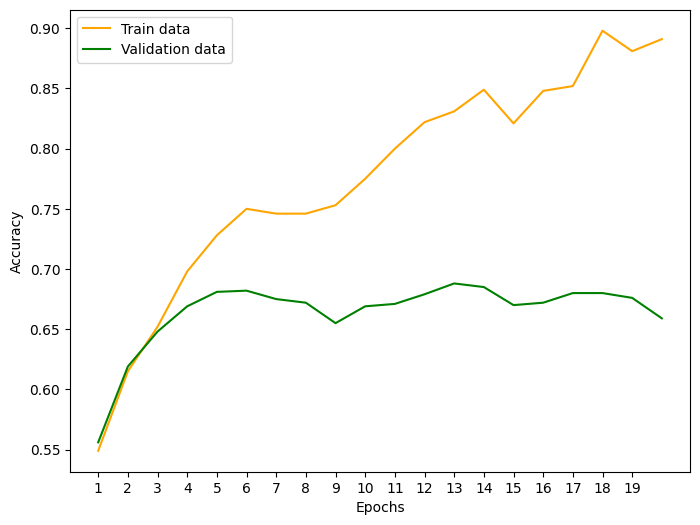

In [16]:
#Plots of accuracy:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
eps = np.arange(1,21)
# plt.ylim(90,95)
plt.xticks(np.arange(0,20))
plt.plot(eps,trainaccs,'orange',label="Train data")
plt.plot(eps,valaccs, 'green', label='Validation data')
plt.legend()
plt.show()

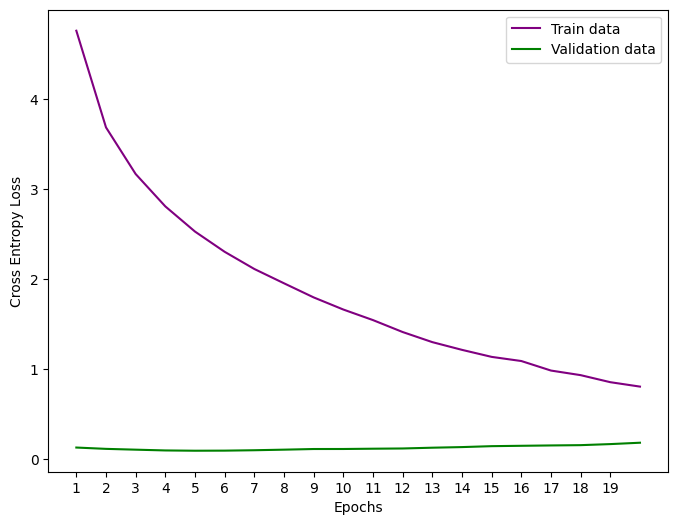

In [17]:
#Plots of loss:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
eps = np.arange(1,21)
# plt.ylim(90,95)
plt.xticks(np.arange(0,20))
plt.plot(eps,loss_t,'purple',label="Train data")
plt.plot(eps,loss_v, 'green', label='Validation data')
plt.legend()
plt.show()

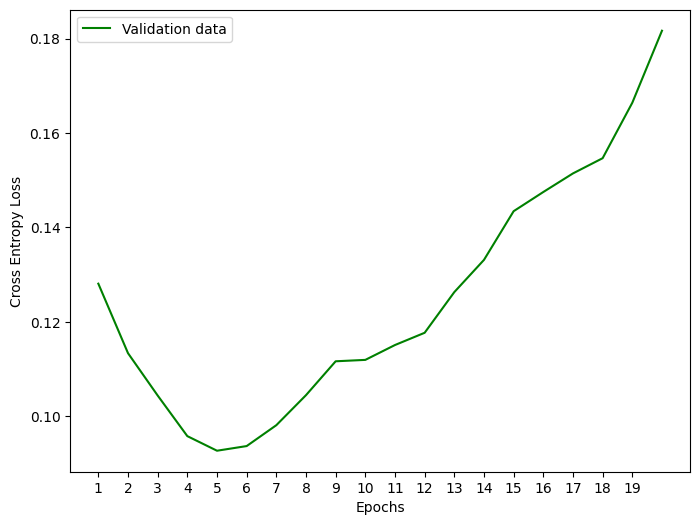

In [18]:
#Plots of loss:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
eps = np.arange(1,21)
# plt.ylim(90,95)
plt.xticks(np.arange(0,20))
# plt.plot(eps,loss_t,'purple',label="Train data")
plt.plot(eps,loss_v, 'green', label='Validation data')
plt.legend()
plt.show()

In [19]:
#Comparision of scheduler
lr_train = np.array([4.8267446,3.6123343, 3.0997598,2.751738,2.4861553,2.2644663,2.068952,1.8973457,1.7478659,1.5998421,1.4763336,1.3568488,1.2573795,1.1618962,1.0666112,0.9850452,0.89684457,0.8208717,
 0.76688,0.72068715])
lr_val = np.array([0.12529357,0.10450778,0.09618945,0.09385785,0.09412806,0.09069528,0.08882987,0.08804294,0.08979881,0.09351919,0.10316746,0.11604999,0.12372348,0.12584366,0.13077053,0.1317522,0.1419825,0.15237904,0.16274376,0.16384901])
wo_train = np.array([4.8653, 3.6573, 3.1862, 2.8779, 2.6409, 2.4466, 2.2700, 2.1135, 1.9730,
        1.8376, 1.7420, 1.6335, 1.5481, 1.4443, 1.3547, 1.3146, 1.2454, 1.1907,
        1.1475, 1.0778, 0.9883, 0.9565, 0.8862, 0.8662, 0.8134, 0.7863, 0.7771,
        0.7353, 0.6883, 0.6879, 0.6746, 0.6109, 0.6046, 0.5638, 0.5293, 0.5496,
        0.5270, 0.4853, 0.4909, 0.5053])
wo_val = np.array([0.1260, 0.1058, 0.0973, 0.0908, 0.0889, 0.0886, 0.0931, 0.0991, 0.1038,
        0.1157, 0.1245, 0.1341, 0.1328, 0.1441, 0.1563, 0.1432, 0.1534, 0.1530,
        0.1569, 0.1685, 0.1889, 0.1764, 0.1897, 0.1949, 0.2098, 0.2122, 0.2234,
        0.2219, 0.2264, 0.2453, 0.2343, 0.2533, 0.2587, 0.2688, 0.2705, 0.2745,
        0.2731, 0.2943, 0.2705, 0.2840])

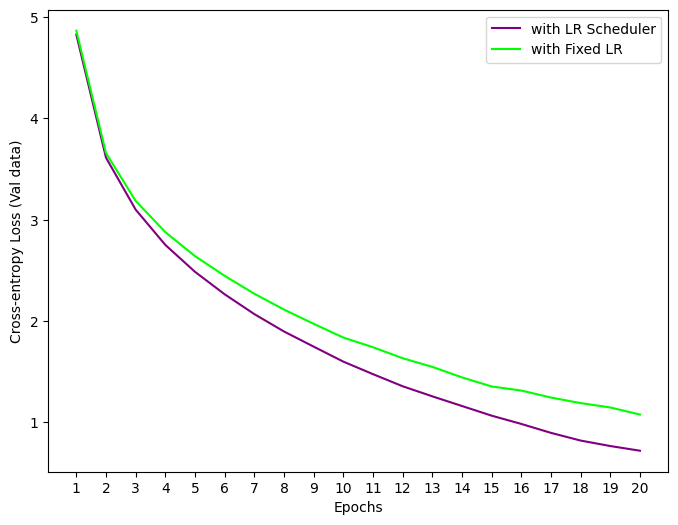

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Cross-entropy Loss (Val data)')
eps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(eps)
# plt.xlim(0,5)
# plt.ylim(1,3)
plt.plot(eps,lr_train,'purple',label="with LR Scheduler")
plt.plot(eps,wo_train[:20], 'lime', label='with Fixed LR')
plt.legend()
plt.show()

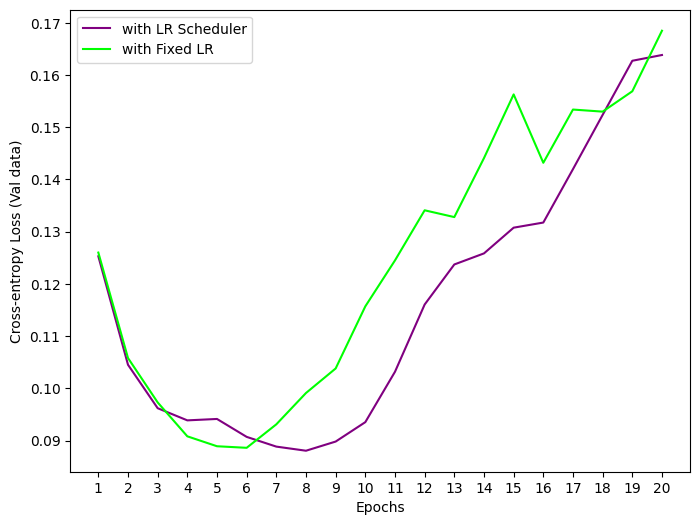

In [20]:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Cross-entropy Loss (Val data)')
eps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(eps)
# plt.xlim(0,5)
# plt.ylim(1,3)
plt.plot(eps,lr_val,'purple',label="with LR Scheduler")
plt.plot(eps,wo_val[:20], 'lime', label='with Fixed LR')
plt.legend()
plt.show()

tensor(0.6590, device='cuda:0')
tensor([0.6408, 0.7416, 0.4600, 0.4951, 0.4889, 0.6047, 0.7054, 0.7745, 0.7925,
        0.8440], device='cuda:0')


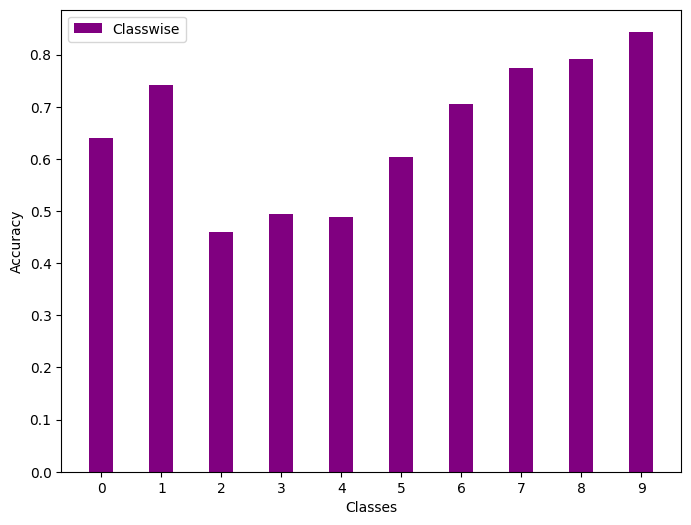

In [22]:
metric = MulticlassAccuracy(num_classes=10, average=None).to('cuda:0')
pred_y = torch.argmax(score_val, dim=1)
classwise = metric(score_val, test_y[:1000].to('cuda:0'))
val_acc_met = Accuracy(task="multiclass", num_classes=10).to('cuda:0')
finalacc = val_acc_met(pred_y, test_y[:1000].to('cuda:0'))
print(finalacc)
print(classwise)
###BAR GRAPH OF CLASSWISE ACCURACY
plt.figure(figsize=(8,6))
classes = np.arange(0,10)
plt.xticks(classes)
plt.bar(classes, classwise.to('cpu'), color='purple',label='Classwise',width=0.4)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.legend()
plt.show()